In [10]:
import pandas as pd
import os
import numpy as np 
import math as m 
import matplotlib.pyplot as plt
import scipy as sp
os.chdir("/lab/solexa_page/shruthir/5EU_2021_8/2023/")

In [11]:
DDX3XEU = pd.read_csv("5eushorttimeDDX3X.txt", sep = '\t')
DDX3XEU

,Time,XY,XYYYY
0,0.0,0.000394,0.000921
1,0.5,0.001895,0.002885
2,1.0,0.003318,0.005570
3,1.5,0.003933,0.005239
4,2.0,0.004903,0.005052


In [12]:
x = DDX3XEU.Time

In [13]:
y = DDX3XEU.XY

In [14]:
def test(x, a, b):
    return a/b * (1-np.exp(-b*(x)))               

In [15]:
from scipy.optimize import curve_fit
param, param_cov = curve_fit(test, x, y)

In [16]:
ans = (param[0]/param[1] * (1-np.exp(-param[1]*x)))

No handles with labels found to put in legend.


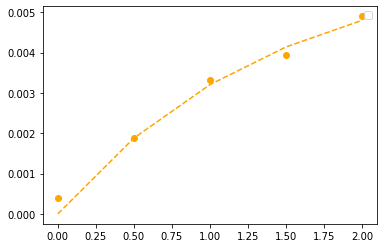

In [18]:
plt.plot(x, y, 'o', color ='orange', label = 'XY')
plt.plot(x, ans, '--', color ='orange')
plt.legend()
plt.show()

In [18]:
#Create fit and plot
y2 = DDX3XEU.XYYYY

from scipy.optimize import curve_fit
param2, param_cov2 = curve_fit(test, x, y2)
ans2 = (param2[0]/param2[1] * (1-np.exp(-param2[1]*x)))

#plt.show()
# p value of 3.078e-8 by Kolmogorov-Smirnov test

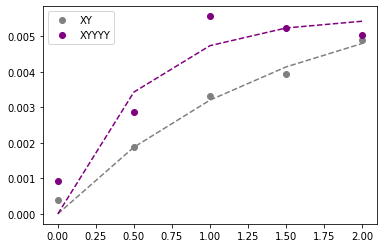

In [41]:
#Combining both plots into one graph 
plt.plot(x, y, 'o', color ='grey', label = 'XY')
plt.plot(x, ans, '--', color ='grey')
plt.legend()
plt.plot(x, y2, 'o', color ='purple', label = 'XYYYY')
plt.plot(x, ans2, '--', color ='purple')
plt.legend()
#plt.show()
plt.savefig("CurvefitDDX3X.png", dpi = 300)

In [19]:
param2

array([0.01070251, 1.92967007])

In [105]:
oldEU = pd.read_csv("5EUXYYY.txt",sep = '\t')
oldEU

,Time,XY,XYYYY
0,0.0,0.000127,0.000048
1,1.0,0.007680,0.030222
2,3.5,0.020875,0.030977
3,7.0,0.028898,0.028524


In [106]:
#Repeating everything for long time points 
def test(x, a, b):
    return a/b * (1-np.exp(-b*(x)))  

In [107]:
#Fit Long time points
xlong = oldEU.Time
y3 = oldEU.XY
y4 = oldEU.XYYYY

from scipy.optimize import curve_fit
param3, param_cov3 = curve_fit(test, xlong, y3)
ans3 = (param3[0]/param3[1] * (1-np.exp(-param3[1]*xlong)))

param4, param_cov4 = curve_fit(test, xlong, y4)
ans4 = (param4[0]/param4[1] * (1-np.exp(-param4[1]*xlong)))

In [92]:
#Get half life values

0    0.000000
1    0.009592
3    0.017222
4    0.018591
Name: Time, dtype: float64

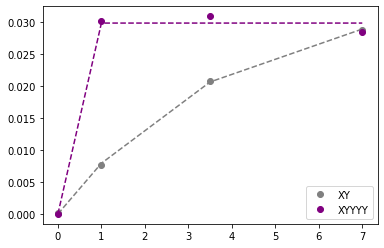

In [108]:
#Plot long time points
plt.plot(xlong, y3, 'o', color ='grey', label = 'XY')
plt.plot(xlong, ans3, '--', color ='grey')
plt.legend()
plt.plot(xlong, y4, 'o', color ='purple', label = 'XYYYY')
plt.plot(xlong, ans4, '--', color ='purple')
plt.legend()
#plt.show()
plt.savefig("CurvefitDDX3Xlong.svg", dpi = 300)